0 -->1 -->5 -->6 -->7 -->9 -->10 -->14 -->16 -->20 -->42 -->43 -->48 -->54 -->59 -->62 -->64 -->67 -->71 -->73 -->75 -->81 -->82 -->98 -->100

 24


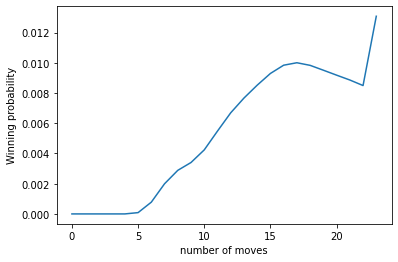

Average number of moves required to win :  37.40650644807713


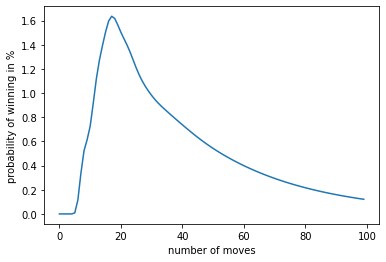

In [86]:
#snl 
import numpy as np 
import matplotlib.pyplot as plt 
import random

def create_transitionMatrix():
    t = np.zeros((101,101),dtype=float)
    for i in range(1,101):
        t[i-1,i:i+6] = 1.0/6
    return t

def board_position():
    pos = [i for i in range(0,101)]
    return pos

T = create_transitionMatrix()
S = board_position()
start_pos = 0
print(S[start_pos],"-->",end="")
prev_pos = start_pos
current_pos = prev_pos
count = 0

ladders ={ 3:19 , 15:37 , 22:42 , 25:64 , 41:73 , 53:74, 63:86 , 76:91 , 84:98}
snakes = {11:7, 18:13 , 28:12, 36:34 , 77:16 , 47:26 , 83:39 , 92:75 , 99:2}
snke_and_ladder = {**snakes,**ladders}


T = create_transitionMatrix()
snl = list(snke_and_ladder.items()) #converting a dictionary to list of tuples
for (i1,i2) in snl:
    iw = np.where(T[:,i1]>0)
    T[:,i1] = 0
    T[iw,i2] += 1/6
S = board_position()
start_pos = 0
prev_pos = start_pos
current_pos = prev_pos
count = 0
v = np.zeros(101)
v[0] = 1
l = []
prob = []
win_avg = 0
while current_pos!=100:
    p=T[prev_pos]
    p/=p.sum() # making sum exactly equal to 1
    current_pos = np.random.choice(S,p=p)
    if (current_pos < 100):
        print(S[current_pos],"-->",end="")
    else:
        print(S[current_pos])
    prev_pos = current_pos
    v = np.matmul(v,T)
    prob.append(v[100])
    l.append(count)
    count+=1

print("\n",count)

plt.plot(l,prob)
plt.xlabel("number of moves") ; plt.ylabel("Winning probability")
plt.show()

state_vectror = np.zeros(101)
state_vectror[0] = 1
walk = 0
avg = 0
probability_sum = 0
y = []
for i in range (0,100):
    walk += 1
    state_vectror = np.matmul(state_vectror,T)
    avg += state_vectror[100]*walk
    y = np.append(y,100*state_vectror[100])
    probability_sum += state_vectror[100]
print("Average number of moves required to win : ",avg/probability_sum)
plt.plot(y)
plt.ylabel("probability of winning in %") ; plt.xlabel("number of moves")
plt.show()

